In [2]:
from tools.infer import run
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

c:\ukr\anaconda3\envs\py39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# %pip install -r requirements.txt
# %pip install protobuf==3.20.0

<class 'PIL.PngImagePlugin.PngImageFile'>


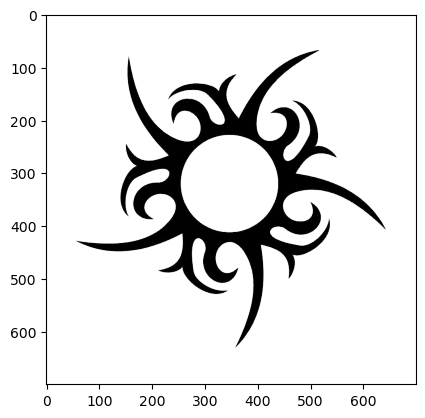

In [33]:
tattoo = Image.open("D:/DS Practice/tattoo.png")
plt.imshow(tattoo)
plt.show()

In [76]:
def applyTattoo(folder_path: str, tattoo_path: str, scalingFactor: int):
    """
    This function helps to overlay a tattoo in .png format over an image of a person 
    showing their hand.

    folder_path: str - absolute or relative path to the test images folder
    tattoo_path: str - absolute or relative path to tatto image file
    scalingFactor: int - used to rescale the tattoo image

    """
    try:
        # reading the tattoo image
        tattoo = Image.open(tattoo_path)
        
        #looping over the test folder to get individual images
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)

            # reading the image using cv2 and then converting to uint8 format to create a PIL image
            np_image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            PIL_image = Image.fromarray(np.uint8(np_image)).convert('RGBA')
            PIL_imageCopy = PIL_image.copy()

            # Customzing the YOLOv6 repo in the backend to extract the coordinates of the bounding boxes drawn 
            # around the target object which in our case is a 'hand'
            p1, p2 = run(weights='best_ckpt.pt'
                        , source=img_path
                        , yaml='D:/DS Practice/YOLOv6/data/dataset.yaml'
                        )

            # getting the height and the width of the bounding box using the points p1 and p2
            bboxSize = [int(round((p2[0]-p1[0]))), int(round((p2[1]-p1[1])))]

            # re-scaling the png image of the tattoo to the size of the bounding box around the hand
            tattooSize = int(round(min(bboxSize)/scalingFactor))
            tattoCopy = tattoo.copy()
            tattoCopy = tattoCopy.resize((tattooSize, tattooSize))
            tattoCopy = tattoCopy.convert('RGBA')

            # overlaying the preprocessed tattoo over the preprocessed background image
            PIL_imageCopy.paste(tattoCopy,
                                (int(round((p2[0]+p1[0])/2)-tattooSize/2)
                                , int(round((p2[1]+p1[1])/2)-tattooSize/(10*(bboxSize[1]/bboxSize[0]))))
                                            , mask=tattoCopy
                                            )
            # showing the original image
            plt.imshow(np_image)
            plt.show()
            # showing the image with tatto on hand
            plt.imshow(PIL_imageCopy)
            plt.show()
        
    except Exception as e:
        return (e)

Save directory already existed
Loading checkpoint from best_ckpt.pt



Fusing model...
Switch model to deploy modality.
  0%|          | 0/1 [00:00<?, ?it/s]
Results saved to d:\DS Practice\YOLOv6\runs/inference\exp


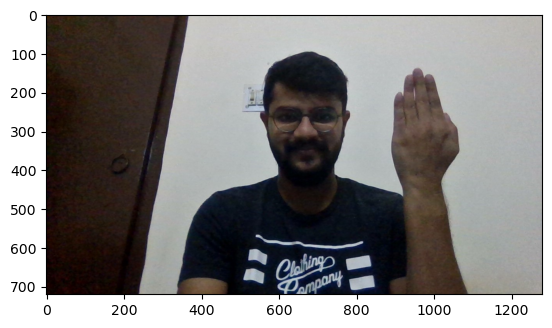

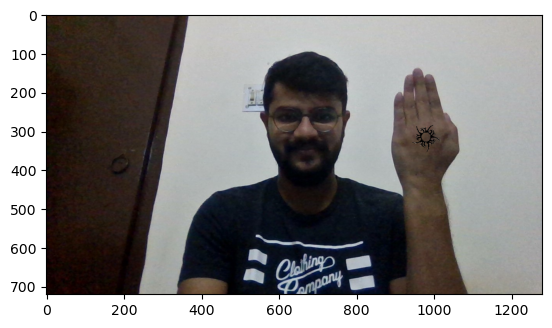

Save directory already existed
Loading checkpoint from best_ckpt.pt

Fusing model...
Switch model to deploy modality.
  0%|          | 0/1 [00:00<?, ?it/s]
Results saved to d:\DS Practice\YOLOv6\runs/inference\exp


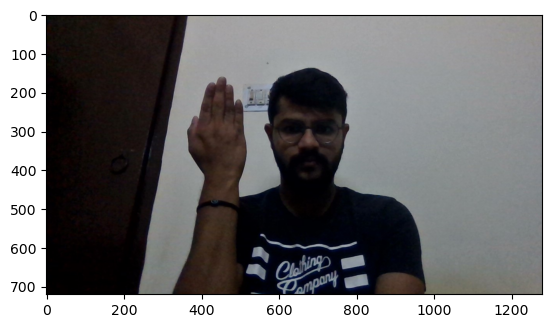

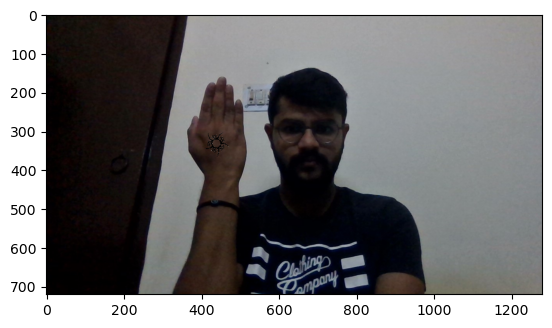

In [79]:
applyTattoo("D:/DS Practice/test_images", "D:/DS Practice/tattoo.png", 2)